In [1]:
import ee
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow as tf
import json
from collections import OrderedDict
import time
import math
import csv
import os
from PIL import Image

# import custom module
import ALR_functions as alr

In [2]:
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AX4XfWiUzDuv3zYOM-HVmIKtKCoui1XgFMY1A7r80loWWy11PoRaumJgtzo



Successfully saved authorization token.


In [14]:
# Read the CSV file into dataframe and sort by estimateLAI in ascending order for plotting purposes
data = pd.read_csv('./gdrive/rf_cart_comparison_2.csv')
data = data.sort_values('estimateLAI', axis=0)
data = data.reset_index(drop=True)
y = data.index

# Get column data
rf_10 = data['rf_estimateLAI_10']
rf_100 = data['rf_estimateLAI_100']
cart = data['cart_estimateLAI']
actual = data['estimateLAI']

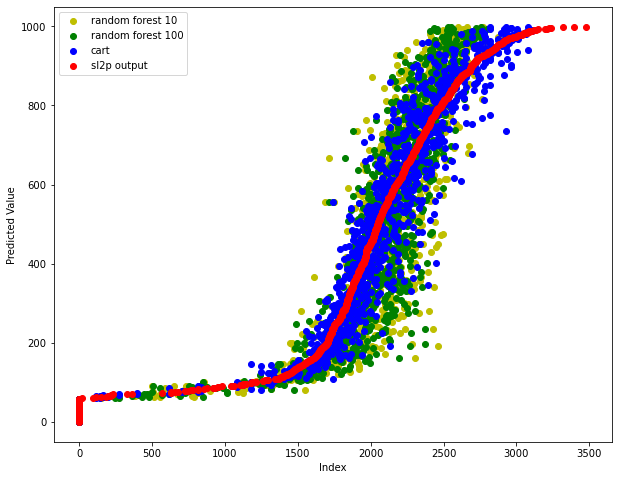

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

fig1 = ax.scatter(rf_10, y, c='y', label='random forest 10')
fig1 = ax.scatter(rf_100, y, c='g', label='random forest 100')
fig1 = ax.scatter(cart, y, c='b', label='cart')
fig1 = ax.scatter(actual, y, c='r', label='sl2p output')

ax.legend()
ax.set_xlabel('Index')
ax.set_ylabel('Predicted Value')

fig.savefig('random_forest_cart_comparison.png')
Image.open('random_forest_cart_comparison.png').save('random_forest_cart_comparison.png','PNG')